# <center>SMART AGRICULTURE AND CROP YIELD PREDICTION</center>
<center><img src= "https://media.nationalgeographic.org/assets/photos/120/983/091a0e2f-b93d-481b-9a60-db520c87ec33.jpg" alt ="Titanic" style='width:500px;'></center><br>

## 🌾 Dataset Overview

This dataset provides insights into various aspects of agriculture, specifically focusing on farm-level details, crop types, irrigation methods, soil properties, and associated metrics such as yield, water usage, fertilizer usage, and pesticide usage. The goal is to analyze and predict crop yields and identify factors that influence productivity.

### Key Features:

- Farm_ID: Unique identifier for each farm.
- Crop_Type: Type of crop cultivated (e.g., Cotton, Carrot, Wheat).
- Irrigation_Type: Method of irrigation used (e.g., Drip, Manual, Flood).
- Soil_Type: Type of soil present on the farm (e.g., Loamy, Sandy, Silty).
- Season: The season in which the crop is grown (e.g., Kharif, Rabi, Zaid).
- Farm_Area (acres): Total area of the farm in acres.
- Fertilizer_Used (tons): Quantity of fertilizer applied.
- Pesticide_Used (kg): Amount of pesticide used.
- Water_Usage (cubic meters): Total water usage for the crop.
- Yield (tons): Total yield of the crop in tons.

###  Objective:

The primary objective is to analyze the relationships between these variables, identify factors that influence crop yields, and build predictive models to estimate yields based on input features.

###  Data Characteristics:

- Data Type: The dataset contains both numerical and categorical features.
- Target Variable: `Yield(tons)`
- Encoded Features: Categorical variables such as `Crop_Type`, `Irrigation_Type`, and `Soil_Type` are encoded for modeling purposes.

###  Modeling Approach:

- **Regression Models Used**:
  -  Linear Regression
  -  Random Forest Regressor
 

<div style="border-radius: 15px 0 15px 0px; border: 2px solid #008b8b; padding: 10px; background-color: #7fffd4; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #008b8b; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 24px;">1. Import necessary Libraries</h1>
</div>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# <span style="color:transparent;">2. Load and Explore Dataset</span>

<div style="border-radius: 15px 0 15px 0px; border: 2px solid #008b8b; padding: 10px; background-color: #7fffd4; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #008b8b; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 24px;">2. Load and Explore Dataset</h1>
</div>

In [2]:
# Load the dataset
df = pd.read_csv('agriculture_dataset.csv')

In [3]:
# Display basic information about the dataset
print("Shape of the dataset:", df.shape)
display(df.head())
print("\nDataset Information:")
print(df.info())
print("\nStatistical Summary:")
display(df.describe().T)

Shape of the dataset: (50, 10)


,Farm_ID,Crop_Type,Farm_Area(acres),Irrigation_Type,Fertilizer_Used(tons),Pesticide_Used(kg),Yield(tons),Soil_Type,Season,Water_Usage(cubic meters)
0,F001,Cotton,329.40,Sprinkler,8.14,2.21,14.44,Loamy,Kharif,76648.20
1,F002,Carrot,18.67,Manual,4.77,4.36,42.91,Peaty,Kharif,68725.54
2,F003,Sugarcane,306.03,Flood,2.91,0.56,33.44,Silty,Kharif,75538.56
3,F004,Tomato,380.21,Rain-fed,3.32,4.35,34.08,Silty,Zaid,45401.23
4,F005,Tomato,135.56,Sprinkler,8.33,4.48,43.28,Clay,Zaid,93718.69



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Farm_ID                    50 non-null     object 
 1   Crop_Type                  50 non-null     object 
 2   Farm_Area(acres)           50 non-null     float64
 3   Irrigation_Type            50 non-null     object 
 4   Fertilizer_Used(tons)      50 non-null     float64
 5   Pesticide_Used(kg)         50 non-null     float64
 6   Yield(tons)                50 non-null     float64
 7   Soil_Type                  50 non-null     object 
 8   Season                     50 non-null     object 
 9   Water_Usage(cubic meters)  50 non-null     float64
dtypes: float64(5), object(5)
memory usage: 4.0+ KB
None

Statistical Summary:


,count,mean,std,min,25%,50%,75%,max
Farm_Area(acres),50.0,254.9638,139.417782,12.50,135.7100,281.980,368.1075,483.88
Fertilizer_Used(tons),50.0,4.9054,2.732689,0.50,2.4375,5.045,6.8850,9.96
Pesticide_Used(kg),50.0,2.3980,1.438613,0.14,0.9725,2.330,3.4175,4.99
Yield(tons),50.0,27.0592,13.345789,3.86,16.1900,28.970,37.8600,48.02
Water_Usage(cubic meters),50.0,56724.2956,27264.992053,5869.75,37818.1525,54097.075,82240.0325,94754.73


<font size = '5'>Insights based on the statistical summary:</font>

Statistical Summary:

The average farm area is around 255 acres, with a standard deviation of 139.
Fertilizer and pesticide usage vary, with average values of 4.9 tons and 2.4 kg, respectively.
The average crop yield is about 27 tons, with water usage averaging 56,724 cubic meters.

In [4]:
# Check for missing and duplicated values
print(f'\nMissing values: {df.isna().sum().sum()}')
print(f'Duplicated values: {df.duplicated().sum()}')


Missing values: 0
Duplicated values: 0


The dataset has:

Missing values: 0 <br>
Duplicated values: 0

In [5]:
# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
non_numerical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Display the lists of numerical and categorical columns
print("\nNumerical Columns:", numerical_columns)
print("Categorical Columns:", non_numerical_columns)


Numerical Columns: ['Farm_Area(acres)', 'Fertilizer_Used(tons)', 'Pesticide_Used(kg)', 'Yield(tons)', 'Water_Usage(cubic meters)']
Categorical Columns: ['Farm_ID', 'Crop_Type', 'Irrigation_Type', 'Soil_Type', 'Season']


<font size = '5'>Insight the dataset</font><br>
Numerical Columns are Farm_Area(acres),  Fertilizer_Used(tons), Pesticide_Used(kg),Yield(tons), Water_Usage(cubic meters). <br>
Categorical Columns are Farm_ID, Crop_Type, Irrigation_Type, Soil_Type, Season.

In [6]:
# Display unique values for each categorical column
for col in non_numerical_columns:
    print(f"\nColumn: {col}")
    print(f"Unique Values: {df[col].unique()}")


Column: Farm_ID
Unique Values: ['F001' 'F002' 'F003' 'F004' 'F005' 'F006' 'F007' 'F008' 'F009' 'F010'
 'F011' 'F012' 'F013' 'F014' 'F015' 'F016' 'F017' 'F018' 'F019' 'F020'
 'F021' 'F022' 'F023' 'F024' 'F025' 'F026' 'F027' 'F028' 'F029' 'F030'
 'F031' 'F032' 'F033' 'F034' 'F035' 'F036' 'F037' 'F038' 'F039' 'F040'
 'F041' 'F042' 'F043' 'F044' 'F045' 'F046' 'F047' 'F048' 'F049' 'F050']

Column: Crop_Type
Unique Values: ['Cotton' 'Carrot' 'Sugarcane' 'Tomato' 'Soybean' 'Rice' 'Maize' 'Wheat'
 'Barley' 'Potato']

Column: Irrigation_Type
Unique Values: ['Sprinkler' 'Manual' 'Flood' 'Rain-fed' 'Drip']

Column: Soil_Type
Unique Values: ['Loamy' 'Peaty' 'Silty' 'Clay' 'Sandy']

Column: Season
Unique Values: ['Kharif' 'Zaid' 'Rabi']


<font size = '5'>Summary:</font>
The Farm_ID column includes identifiers for all 50 farms, showing that each record is tied to a specific farm.

There are 10 different crop types, offering a mix of both food and cash crops.

The Irrigation_Type column reflects varied methods, highlighting both modern and traditional irrigation practices.

The Soil_Type diversity shows a range of soil conditions that could influence farming strategies.

Season indicates that the farms follow distinct growing seasons, which might affect crop choices and yield.

In [ ]:
# Identifying crop types with highest and lowest values for different metrics
# Creating a more readable output format
metrics_summary = {
    "Metric": [
        "Highest Yield", "Lowest Yield",
        "Highest Fertilizer Used", "Lowest Fertilizer Used",
        "Highest Pesticide Used", "Lowest Pesticide Used",
        "Highest Water Usage", "Lowest Water Usage",
        "Highest Farm Area", "Lowest Farm Area"
    ],
    "Crop Type": [
        df.loc[df['Yield(tons)'].idxmax()]['Crop_Type'], df.loc[df['Yield(tons)'].idxmin()]['Crop_Type'],
        df.loc[df['Fertilizer_Used(tons)'].idxmax()]['Crop_Type'], df.loc[df['Fertilizer_Used(tons)'].idxmin()]['Crop_Type'],
        df.loc[df['Pesticide_Used(kg)'].idxmax()]['Crop_Type'], df.loc[df['Pesticide_Used(kg)'].idxmin()]['Crop_Type'],
        df.loc[df['Water_Usage(cubic meters)'].idxmax()]['Crop_Type'], df.loc[df['Water_Usage(cubic meters)'].idxmin()]['Crop_Type'],
        df.loc[df['Farm_Area(acres)'].idxmax()]['Crop_Type'], df.loc[df['Farm_Area(acres)'].idxmin()]['Crop_Type']
    ],
    "Value": [
        df.loc[df['Yield(tons)'].idxmax()]['Yield(tons)'], df.loc[df['Yield(tons)'].idxmin()]['Yield(tons)'],
        df.loc[df['Fertilizer_Used(tons)'].idxmax()]['Fertilizer_Used(tons)'], df.loc[df['Fertilizer_Used(tons)'].idxmin()]['Fertilizer_Used(tons)'],
        df.loc[df['Pesticide_Used(kg)'].idxmax()]['Pesticide_Used(kg)'], df.loc[df['Pesticide_Used(kg)'].idxmin()]['Pesticide_Used(kg)'],
        df.loc[df['Water_Usage(cubic meters)'].idxmax()]['Water_Usage(cubic meters)'], df.loc[df['Water_Usage(cubic meters)'].idxmin()]['Water_Usage(cubic meters)'],
        df.loc[df['Farm_Area(acres)'].idxmax()]['Farm_Area(acres)'], df.loc[df['Farm_Area(acres)'].idxmin()]['Farm_Area(acres)']
    ]
}

metrics_summary_df = pd.DataFrame(metrics_summary)
metrics_summary_df

,Metric,Crop Type,Value
0,Highest Yield,Tomato,48.02
1,Lowest Yield,Maize,3.86
2,Highest Fertilizer Used,Cotton,9.96
3,Lowest Fertilizer Used,Cotton,0.50
4,Highest Pesticide Used,Rice,4.99
5,Lowest Pesticide Used,Barley,0.14
6,Highest Water Usage,Cotton,94754.73
7,Lowest Water Usage,Rice,5869.75
8,Highest Farm Area,Rice,483.88
9,Lowest Farm Area,Sugarcane,12.50


<font size = '5'>Insights based on the summary of crop metrics:</font>

1. **Yield Insights**:
   - **Highest Yield**: Tomato has the highest yield at 48.02 tons, indicating its potential as a highly productive crop under favorable conditions.
   - **Lowest Yield**: Maize has the lowest yield at 3.86 tons, which could suggest challenges in cultivation, lower productivity, or constraints due to environmental or management factors.

2. **Fertilizer Usage**:
   - **Highest Fertilizer Usage**: Cotton stands out with the highest fertilizer usage at 9.96 tons, suggesting a high nutrient demand for maximizing productivity.
   - **Lowest Fertilizer Usage**: Interestingly, Cotton also has the lowest fertilizer usage at 0.50 tons for certain instances, which could reflect variability in management practices or differing needs across different fields.

3. **Pesticide Usage**:
   - **Highest Pesticide Usage**: Rice uses the highest amount of pesticides at 4.99 kg, which may indicate higher susceptibility to pests and the need for more intensive pest management.
   - **Lowest Pesticide Usage**: Barley, on the other hand, has the lowest pesticide usage at 0.14 kg, suggesting it may be less prone to pest attacks or is managed with minimal chemical intervention.

4. **Water Usage**:
   - **Highest Water Usage**: Cotton has the highest water usage, consuming 94,754.73 cubic meters. This highlights the water-intensive nature of Cotton cultivation, which may have implications for irrigation and sustainability.
   - **Lowest Water Usage**: Rice, despite being a typically water-demanding crop, shows the lowest water usage at 5,869.75 cubic meters, potentially due to different cultivation methods, such as more water-efficient practices.

5. **Farm Area**:
   - **Highest Farm Area**: Rice is cultivated on the largest farm area, with 483.88 acres, indicating its importance or high demand in the region.
   - **Lowest Farm Area**: Sugarcane has the smallest farm area at 12.50 acres, which could reflect niche cultivation or limited demand.

The insights illustrate significant variability in resource usage, productivity, and farm area across different crop types. Cotton and Rice, for example, demonstrate contrasting needs and environmental demands, impacting their cultivation practices. Tomato's high yield makes it particularly productive, while Maize’s low yield points to potential areas for improvement or challenges to address. Such data is valuable for optimizing agricultural practices and improving crop productivity and sustainability.


In [8]:
# Checking if any farms have multiple crop types
multiple_crops_per_farm = df.groupby('Farm_ID')['Crop_Type'].nunique().reset_index()
multiple_crops_per_farm = multiple_crops_per_farm[multiple_crops_per_farm['Crop_Type'] > 1]

# Displaying the result or a message if no farm has multiple crops
if not multiple_crops_per_farm.empty:
    import ace_tools as tools; tools.display_dataframe_to_user(name="Farms with Multiple Crop Types", dataframe=multiple_crops_per_farm)
else:
    print("No farms have multiple crop types.")

No farms have multiple crop types.


<font size ='5'>Summary</font><br>
Each farm in the dataset is dedicated to only one type of crop. This implies that for each unique Farm_ID, there is only one value in the Crop_Type column.

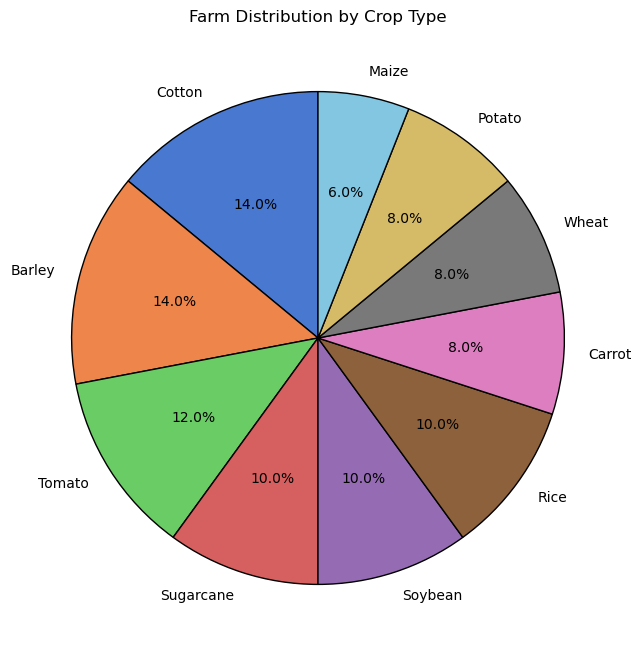

In [9]:
# Plotting the pie chart for farm distribution by crop type
plt.figure(figsize=(8, 8))
crop_type_counts = df['Crop_Type'].value_counts()
plt.pie(crop_type_counts, labels=crop_type_counts.index, autopct='%1.1f%%', startangle=90,
        colors=sns.color_palette('muted'), wedgeprops={'edgecolor': 'black'})

plt.title('Farm Distribution by Crop Type')
plt.show()


<font size = '5'>Insights based on the analysis and visualizations: </font>

1. **Crop Type and Farm Association**:
   - Each crop type is associated with a distinct set of farms, and no single farm grows multiple crop types. This setup may imply a **specialization in crop cultivation**, where each farm is focused on a single crop, possibly to optimize resources and expertise for specific crop needs.
   - **Most Common Crops**: Certain crops like Barley, Cotton, and Tomato are associated with multiple farms, while others like Maize have fewer farms. This distribution could reflect the popularity or economic value of these crops in the dataset's region.

2. **Farm Distribution by Crop Type (Pie Chart)**:
   - The pie chart provides a visual distribution of farms across crop types. We can see that the **largest segments** represent crops with a broader farm base, such as Cotton and Barley. In contrast, **smaller segments** correspond to crops like Maize and Potato, indicating fewer farms cultivate these crops.
   - This distribution can help identify **crop popularity and farming focus** within the dataset, potentially indicating the region’s agricultural strengths or specific crop demands.

3. **Specialization of Farms**:
   - Since no farm grows multiple crop types, each farm’s focus on a single crop type could reflect specialized farming practices or crop rotations that don’t overlap within the same season. This setup might also be due to factors like soil suitability, water availability, or climate requirements specific to each crop.

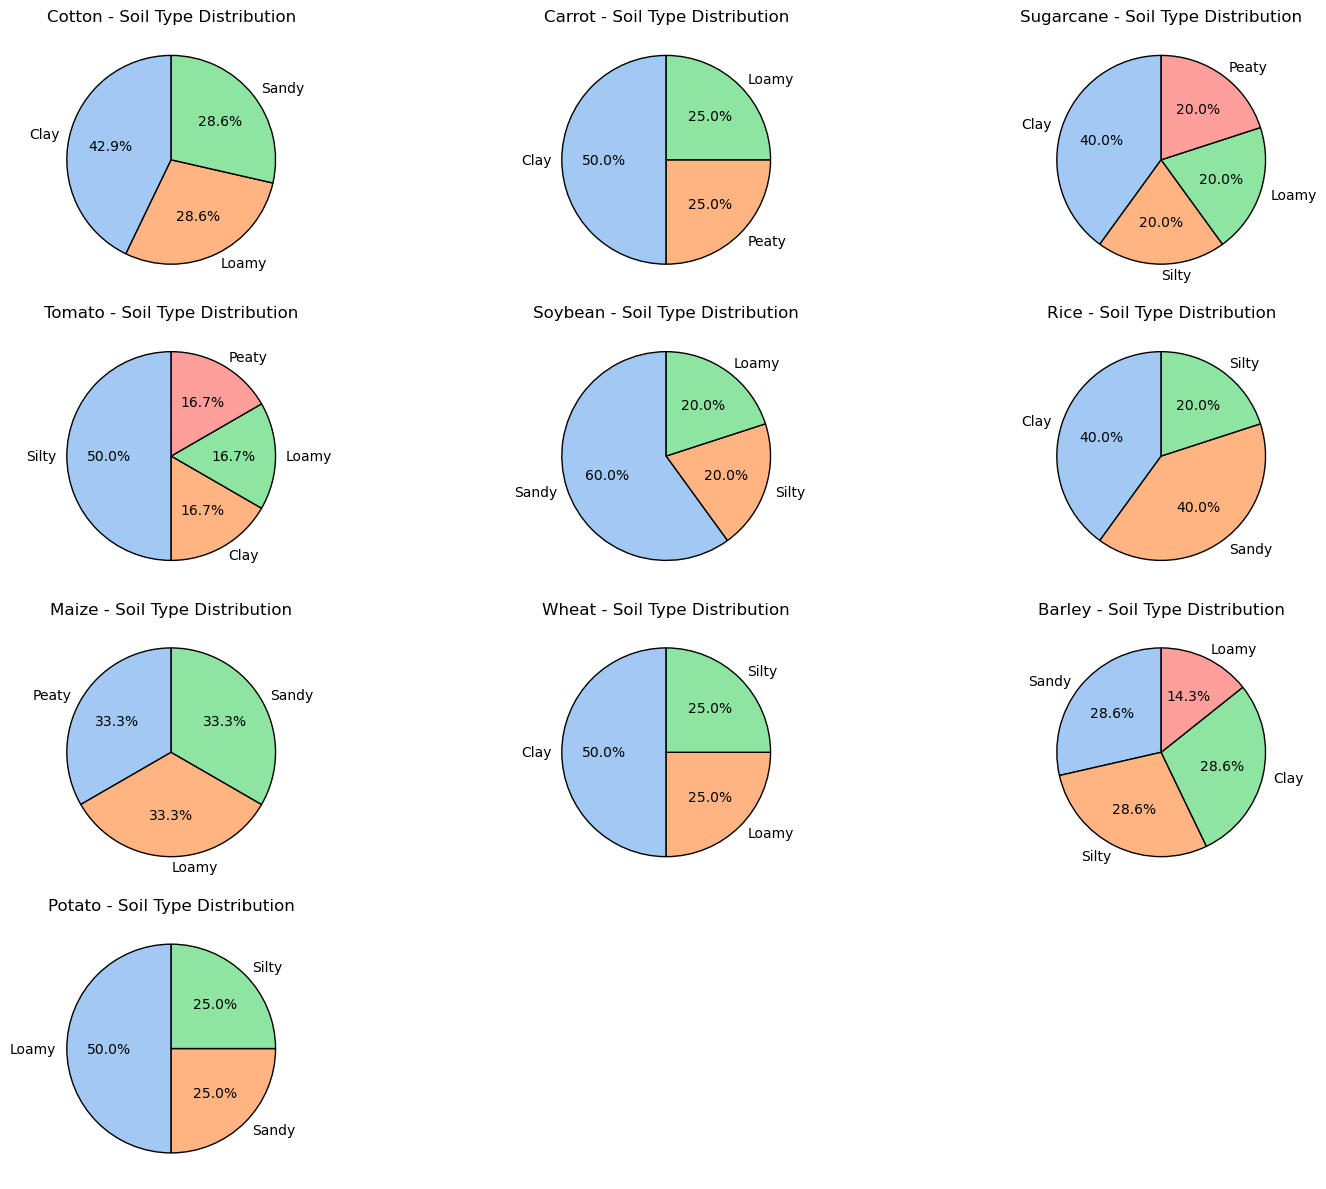

In [ ]:
# Plotting pie charts for each crop type to show distribution of soil types they grow in
unique_crops = df['Crop_Type'].unique()

# Set up a grid for multiple pie charts
plt.figure(figsize=(15, 12))
for i, crop in enumerate(unique_crops, 1):
    plt.subplot(4, 3, i)     # The subplot() function takes three arguments that describes the layout of the figure. the dictionary quantities say 4 columns but the rows should increase based on how many plots are being generated.
    soil_distribution = df[df['Crop_Type'] == crop]['Soil_Type'].value_counts()
    plt.pie(soil_distribution, labels=soil_distribution.index, autopct='%1.1f%%', startangle=90,     # We use autopct to display the percent value using Python string formatting.
            colors=sns.color_palette('pastel'), wedgeprops={'edgecolor': 'black'})
    plt.title(f'{crop} - Soil Type Distribution')

plt.tight_layout()
plt.show()


<font size = '5'>Insights based on the soil type distribution for each crop type </font>

1. **Diverse Soil Types**:
   - Certain crops like **Barley**, **Tomato** and **Sugarcane** are grown in a wide variety of soil types, including Sandy, Silty, Clay, and Loamy. This indicates that these crops are versatile and adaptable to multiple soil conditions.

2. **Limited Soil Preferences**:
   - Crops like **Carrot** and **Soybean** are associated with fewer soil types. For example, Carrot is primarily found in Peaty, Loamy, and Clay soils, while Soybean predominantly grows in Sandy, Silty, and Loamy soils. This could suggest a more specific soil preference or suitability for these crops.

3. **Predominant Soil Types**:
   - **Sandy and Loamy soils** are common across multiple crops, including Cotton, Rice, and Soybean. This prevalence indicates that these soil types are likely more suitable or widely available for various crops in the dataset.

4. **Unique Soil Associations**:
   - **Peaty soil** is less commonly associated with crops, appearing mainly with Carrot, Sugarcane, Maize, and Tomato. This may indicate that Peaty soil is less prevalent or less suitable for a broad range of crops, except for a few specialized types.

5. **Adaptable Crops**:
   - **Sugarcane**,**Tomato** and **Barley** grow in a variety of soil types, including Loamy, Silty, Clay, and Peaty soils. This adaptability makes them versatile crops, potentially less affected by soil type variability.


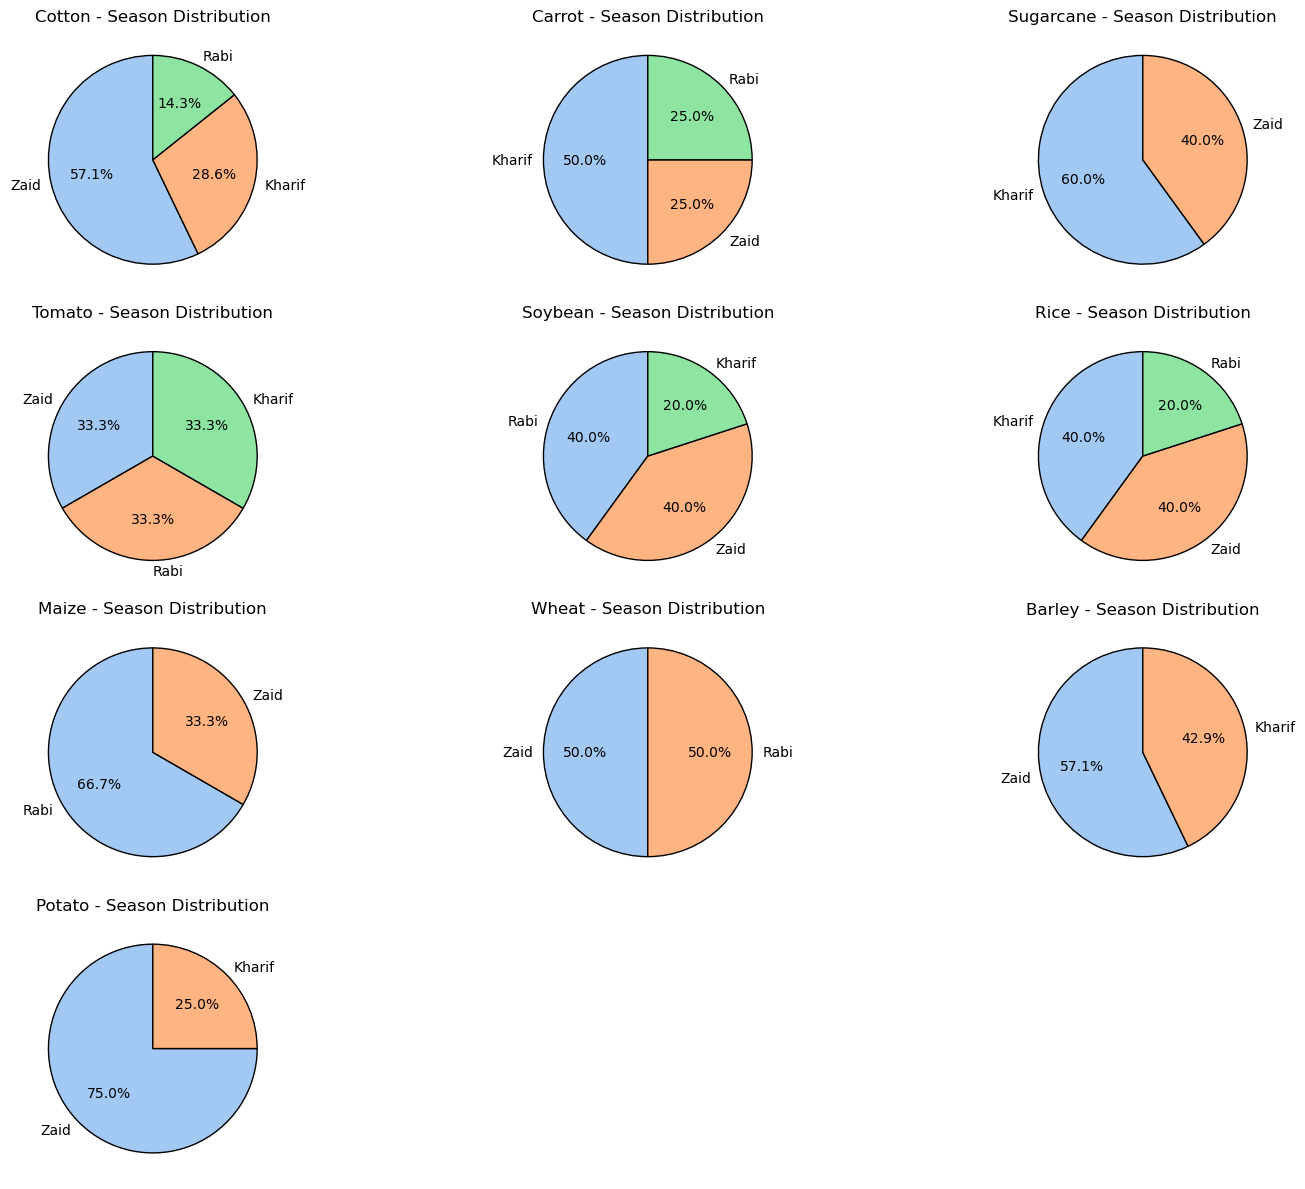

In [12]:
# Plotting pie charts for each crop type to show distribution of seasons they are grown in
plt.figure(figsize=(15, 12))
for i, crop in enumerate(df['Crop_Type'].unique(), 1):
    plt.subplot(4, 3, i)
    season_distribution = df[df['Crop_Type'] == crop]['Season'].value_counts()
    plt.pie(season_distribution, labels=season_distribution.index, autopct='%1.1f%%', startangle=90,
            colors=sns.color_palette('pastel'), wedgeprops={'edgecolor': 'black'})
    plt.title(f'{crop} - Season Distribution')

plt.tight_layout()
plt.show()


Insights based on the season distribution of crop types:

1. **Multi-Season Crops**:
   - Crops like **Carrot, Rice, Soybean, and Tomato** are grown across all three seasons (Kharif, Zaid, and Rabi), showcasing their adaptability to different growing conditions and potentially offering continuous yields throughout the year.
   - **Cotton** also spans all seasons but has a higher concentration in the Kharif season, indicating a strong preference for certain climatic conditions during that period.

2. **Season-Specific Crops**:
   - **Maize and Wheat** are grown in two seasons (Rabi and Zaid) but do not appear in the Kharif season. This suggests a preference for specific climatic or soil conditions during Rabi and Zaid.
   - **Sugarcane** is predominantly grown in the Kharif and Zaid seasons, showing a notable absence from Rabi, which might be due to climatic or crop cycle requirements.

3. **Dominant Season for Certain Crops**:
   - **Potato** is primarily grown in the Zaid season (75% of the time) and less in the Kharif season. This suggests a high yield during Zaid, aligning with favorable conditions.
   - **Barley** and **Cotton** are heavily cultivated during the Kharif and Zaid seasons, indicating their importance and adaptability to these seasons' conditions.

4. **Balanced Crops Across Seasons**:
   - **Tomato** displays a balanced distribution across Kharif, Zaid, and Rabi seasons, indicating it can be cultivated year-round without significant preference toward any single season.
   - **Wheat** has a balanced 50-50 split between Zaid and Rabi, suggesting stable and predictable yields during these times.

### Overall Observations:
- **Crop Adaptability**: Certain crops like Tomato, Rice, and Carrot are highly versatile, thriving across multiple seasons, whereas others like Maize and Wheat have more focused seasonal windows.
- **Seasonal Preferences**: The distribution of crop types per season highlights the significance of specific climatic and growing conditions needed to optimize yields, which can be critical for planning planting cycles and resource allocation.



### Summary Insights:

- **Loamy soil** is generally associated with higher yields for many crops (Barley, Carrot, Soybean, Sugarcane), highlighting its favorable characteristics for plant growth due to its balance of sand, silt, and clay.
- **Sandy soil** supports high yields for crops like Cotton, Maize, and Potato but leads to lower yields for crops like Barley and Soybean, reflecting its mixed suitability depending on crop needs.
- **Clay soil** provides high yields for Rice and Tomato but can negatively impact yields for Carrot, Sugarcane, and Wheat due to its dense structure and water retention characteristics.

Understanding these soil-crop relationships can help optimize crop selection and management practices, enhancing yields based on soil conditions.

In [13]:
# Identifying the soil type with the highest Fertilizer Used for each crop type
highest_fertilizer_per_crop_soil = df.groupby(['Crop_Type', 'Soil_Type'])['Fertilizer_Used(tons)'].mean().reset_index()
max_fertilizer_per_crop = highest_fertilizer_per_crop_soil.loc[highest_fertilizer_per_crop_soil.groupby('Crop_Type')['Fertilizer_Used(tons)'].idxmax()]

print("Soil Type with Highest Fertilizer Used for Each Crop Type:")
display(max_fertilizer_per_crop)

# Identifying the soil type with the lowest Fertilizer Used for each crop type
min_fertilizer_per_crop = highest_fertilizer_per_crop_soil.loc[highest_fertilizer_per_crop_soil.groupby('Crop_Type')['Fertilizer_Used(tons)'].idxmin()]

print("\nSoil Type with Lowest Fertilizer Used for Each Crop Type:")
display(min_fertilizer_per_crop)

Soil Type with Highest Fertilizer Used for Each Crop Type:


,Crop_Type,Soil_Type,Fertilizer_Used(tons)
1,Barley,Loamy,7.790
5,Carrot,Loamy,5.890
8,Cotton,Loamy,6.245
10,Maize,Loamy,4.910
13,Potato,Loamy,9.430
16,Rice,Clay,7.165
21,Soybean,Silty,8.570
23,Sugarcane,Loamy,6.420
26,Tomato,Clay,8.330
30,Wheat,Clay,6.105



Soil Type with Lowest Fertilizer Used for Each Crop Type:


,Crop_Type,Soil_Type,Fertilizer_Used(tons)
2,Barley,Sandy,2.900
6,Carrot,Peaty,4.770
9,Cotton,Sandy,2.100
11,Maize,Peaty,0.570
14,Potato,Sandy,3.860
17,Rice,Sandy,4.595
19,Soybean,Loamy,1.180
22,Sugarcane,Clay,1.895
27,Tomato,Loamy,4.750
32,Wheat,Silty,1.790


### Summary Observations:

- **Loamy Soil**: While it often requires high fertilizer input due to its balanced texture and nutrient-holding capacity, it also supports high yields, making the investment in fertilizers worthwhile for many crops.
- **Sandy Soil**: Consistently appears with the lowest fertilizer usage, possibly due to its poor retention capabilities, leading to limited absorption and requiring different nutrient management practices.
- **Soil-Crop Specificity**: Fertilizer usage varies significantly depending on the crop-soil combination, reflecting complex interactions between soil properties, nutrient needs, and crop characteristics.

These insights can help in optimizing fertilizer management practices to reduce costs and improve yields by targeting specific soil and crop combinations.

In [14]:
# Identifying the soil type with the highest Water Usage for each crop type
highest_water_usage_per_crop_soil = df.groupby(['Crop_Type', 'Soil_Type'])['Water_Usage(cubic meters)'].mean().reset_index()
max_water_usage_per_crop = highest_water_usage_per_crop_soil.loc[highest_water_usage_per_crop_soil.groupby('Crop_Type')['Water_Usage(cubic meters)'].idxmax()]

# Identifying the soil type with the lowest Water Usage for each crop type
min_water_usage_per_crop = highest_water_usage_per_crop_soil.loc[highest_water_usage_per_crop_soil.groupby('Crop_Type')['Water_Usage(cubic meters)'].idxmin()]

# Displaying the results
print("Soil Type with Highest Water Usage for Each Crop Type:")
display(max_water_usage_per_crop)

print("\nSoil Type with Lowest Water Usage for Each Crop Type:")
display(min_water_usage_per_crop)

Soil Type with Highest Water Usage for Each Crop Type:


,Crop_Type,Soil_Type,Water_Usage(cubic meters)
1,Barley,Loamy,93656.060
5,Carrot,Loamy,88301.460
8,Cotton,Loamy,57761.240
11,Maize,Peaty,60202.140
14,Potato,Sandy,86989.880
17,Rice,Sandy,78580.925
19,Soybean,Loamy,73646.550
25,Sugarcane,Silty,75538.560
26,Tomato,Clay,93718.690
31,Wheat,Loamy,65838.400



Soil Type with Lowest Water Usage for Each Crop Type:


,Crop_Type,Soil_Type,Water_Usage(cubic meters)
3,Barley,Silty,39956.880000
6,Carrot,Peaty,68725.540000
7,Cotton,Clay,49551.673333
10,Maize,Loamy,18660.030000
15,Potato,Silty,5874.170000
18,Rice,Silty,9392.380000
21,Soybean,Silty,43610.210000
24,Sugarcane,Peaty,33615.770000
28,Tomato,Peaty,37466.110000
32,Wheat,Silty,23208.040000


### Summary Observations:

- **Loamy Soil** often has the highest water usage for multiple crops, reflecting its versatility and high crop yields but also necessitating significant water input.
- **Silty Soil** consistently shows the lowest water usage for several crops due to its moisture retention capabilities, reducing the need for excessive irrigation.
- **Sandy Soil** demands high water usage for certain crops like Potato and Rice due to its quick drainage properties.
- The variability in water usage by soil type emphasizes the importance of choosing the right irrigation strategy based on soil properties and crop needs for optimized water management and crop yield.

These insights can be valuable for improving water efficiency and resource management in agricultural practices.

In [15]:
# Identifying the soil and irrigation type with the highest Water Usage for each crop type
highest_water_usage_per_crop = df.groupby(['Crop_Type', 'Soil_Type', 'Irrigation_Type'])['Water_Usage(cubic meters)'].mean().reset_index()
max_water_usage_per_crop = highest_water_usage_per_crop.loc[highest_water_usage_per_crop.groupby('Crop_Type')['Water_Usage(cubic meters)'].idxmax()]

# Identifying the soil and irrigation type with the lowest Water Usage for each crop type
min_water_usage_per_crop = highest_water_usage_per_crop.loc[highest_water_usage_per_crop.groupby('Crop_Type')['Water_Usage(cubic meters)'].idxmin()]

# Displaying the results
print("Soil and Irrigation Type with Highest Water Usage for Each Crop Type:")
display(max_water_usage_per_crop)

print("\nSoil and Irrigation Type with Lowest Water Usage for Each Crop Type:")
display(min_water_usage_per_crop)


Soil and Irrigation Type with Highest Water Usage for Each Crop Type:


,Crop_Type,Soil_Type,Irrigation_Type,Water_Usage(cubic meters)
2,Barley,Loamy,Drip,93656.060
9,Carrot,Loamy,Manual,88301.460
16,Cotton,Sandy,Flood,94754.730
19,Maize,Peaty,Drip,60202.140
22,Potato,Loamy,Rain-fed,93407.380
26,Rice,Sandy,Flood,78580.925
28,Soybean,Loamy,Manual,73646.550
32,Sugarcane,Clay,Flood,88976.510
37,Tomato,Clay,Sprinkler,93718.690
44,Wheat,Loamy,Flood,65838.400



Soil and Irrigation Type with Lowest Water Usage for Each Crop Type:


,Crop_Type,Soil_Type,Irrigation_Type,Water_Usage(cubic meters)
3,Barley,Sandy,Flood,25132.48
10,Carrot,Peaty,Manual,68725.54
17,Cotton,Sandy,Rain-fed,12007.70
18,Maize,Loamy,Rain-fed,18660.03
24,Potato,Silty,Sprinkler,5874.17
27,Rice,Silty,Drip,9392.38
30,Soybean,Sandy,Manual,40614.40
35,Sugarcane,Peaty,Rain-fed,33615.77
39,Tomato,Peaty,Sprinkler,37466.11
45,Wheat,Silty,Manual,23208.04


### Summary Observations:

- **Loamy Soil** with various irrigation methods often results in high water usage for many crops, highlighting its moisture retention but also its need for sustained watering.
- **Sandy Soil** tends to have both high and low water usage depending on the crop and irrigation type, reflecting its variability in water retention.
- **Drip and Sprinkler irrigation systems** show both high and low water usage, indicating that while efficient, the crop and soil properties greatly influence water demand.
- **Flood irrigation** often leads to high water usage, particularly for water-intensive crops like Cotton and Rice, emphasizing the inefficiency of this method.

These insights emphasize the critical interaction between soil, irrigation methods, and water usage efficiency, providing a guide for optimizing water management practices.

In [16]:
# Identifying the season and irrigation type with the highest crop yield for each crop type
highest_yield_per_crop_season_irrigation = df.groupby(['Crop_Type', 'Season', 'Irrigation_Type'])['Yield(tons)'].mean().reset_index()
max_yield_per_crop = highest_yield_per_crop_season_irrigation.loc[highest_yield_per_crop_season_irrigation.groupby('Crop_Type')['Yield(tons)'].idxmax()]

# Identifying the season and irrigation type with the lowest crop yield for each crop type
min_yield_per_crop = highest_yield_per_crop_season_irrigation.loc[highest_yield_per_crop_season_irrigation.groupby('Crop_Type')['Yield(tons)'].idxmin()]

# Displaying the results
print("Season and Irrigation Type with Highest Crop Yield for Each Crop Type:")
display(max_yield_per_crop)

print("\nSeason and Irrigation Type with Lowest Crop Yield for Each Crop Type:")
display(min_yield_per_crop)


Season and Irrigation Type with Highest Crop Yield for Each Crop Type:


,Crop_Type,Season,Irrigation_Type,Yield(tons)
2,Barley,Zaid,Drip,46.470
7,Carrot,Zaid,Manual,47.700
13,Cotton,Zaid,Rain-fed,46.190
16,Maize,Zaid,Drip,39.960
17,Potato,Kharif,Drip,31.470
22,Rice,Kharif,Flood,35.010
26,Soybean,Rabi,Drip,44.930
32,Sugarcane,Zaid,Sprinkler,32.235
36,Tomato,Rabi,Flood,48.020
41,Wheat,Zaid,Manual,36.900



Season and Irrigation Type with Lowest Crop Yield for Each Crop Type:


,Crop_Type,Season,Irrigation_Type,Yield(tons)
3,Barley,Zaid,Flood,11.343333
6,Carrot,Rabi,Flood,24.340000
11,Cotton,Zaid,Flood,10.990000
14,Maize,Rabi,Drip,3.860000
18,Potato,Zaid,Drip,18.130000
21,Rice,Kharif,Drip,4.230000
25,Soybean,Kharif,Drip,17.250000
30,Sugarcane,Kharif,Flood,20.760000
35,Tomato,Rabi,Drip,12.920000
40,Wheat,Zaid,Drip,5.440000


### Summary Observations:

- **Drip irrigation** often appears in both high and low-yield scenarios, emphasizing the importance of precise water management for maximizing yields.
- **Flood irrigation** is associated with both high and low yields, particularly for crops like Rice, Tomato, and Sugarcane, highlighting its mixed effectiveness depending on crop and season.
- **Seasonal Variation**: Many crops achieve their highest yields in the **Zaid and Rabi seasons**, but low yields can also occur during these periods depending on irrigation practices.
- **Manual and Rain-fed irrigation** methods appear effective for certain crops, reflecting the importance of natural rainfall and human intervention in optimizing yields.

These insights can help guide irrigation and crop management strategies based on season-specific needs and crop characteristics.

In [17]:
# Identifying the season with the highest Pesticide Used for each crop type
highest_pesticide_usage_per_crop_season = df.groupby(['Crop_Type', 'Season'])['Pesticide_Used(kg)'].mean().reset_index()
max_pesticide_usage_per_crop = highest_pesticide_usage_per_crop_season.loc[highest_pesticide_usage_per_crop_season.groupby('Crop_Type')['Pesticide_Used(kg)'].idxmax()]

# Identifying the season with the lowest Pesticide Used for each crop type
min_pesticide_usage_per_crop = highest_pesticide_usage_per_crop_season.loc[highest_pesticide_usage_per_crop_season.groupby('Crop_Type')['Pesticide_Used(kg)'].idxmin()]

# Displaying results
print("Season with Highest Pesticide Used for Each Crop Type:")
display(max_pesticide_usage_per_crop)

print("\nSeason with Lowest Pesticide Used for Each Crop Type:")
display(min_pesticide_usage_per_crop)

Season with Highest Pesticide Used for Each Crop Type:


,Crop_Type,Season,Pesticide_Used(kg)
0,Barley,Kharif,2.213333
3,Carrot,Rabi,2.940000
5,Cotton,Kharif,3.485000
8,Maize,Rabi,2.850000
10,Potato,Kharif,2.680000
13,Rice,Rabi,3.450000
17,Soybean,Zaid,2.890000
18,Sugarcane,Kharif,1.660000
22,Tomato,Zaid,4.415000
23,Wheat,Rabi,3.030000



Season with Lowest Pesticide Used for Each Crop Type:


,Crop_Type,Season,Pesticide_Used(kg)
1,Barley,Zaid,1.560000
4,Carrot,Zaid,0.810000
6,Cotton,Rabi,0.910000
9,Maize,Zaid,1.310000
11,Potato,Zaid,2.253333
14,Rice,Zaid,1.765000
16,Soybean,Rabi,2.450000
19,Sugarcane,Zaid,1.415000
20,Tomato,Kharif,0.655000
24,Wheat,Zaid,2.805000


### Summary Observations:

- **Kharif and Rabi Seasons**: These seasons generally have higher pesticide usage for many crops, reflecting increased pest and disease pressures due to climatic conditions such as humidity and temperature.
- **Zaid Season**: This season often shows lower pesticide usage, indicating reduced pest activity due to drier conditions.
- **Crop-Specific Patterns**: Crops like **Tomato, Cotton, and Rice** tend to have high pesticide requirements during specific seasons, highlighting their vulnerability to pests and diseases during these periods.
- **Efficient Pest Management**: Understanding seasonal patterns of pesticide usage can help optimize pest management strategies, reducing costs and improving crop health.

# <span style="color:transparent;">3. Data Preprocessing</span>

<div style="border-radius: 15px 0 15px 0px; border: 2px solid #008b8b; padding: 10px; background-color: #7fffd4; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #008b8b; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 24px;"> 3. Data Preprocessing</h1>
</div> 

In [ ]:
# Convert categorical data to numerical data by using one hot encoding
def encode_categorical_columns(df, columns):
    df_encoded = df.copy()
    
    # Initializing encoders
    label_encoder = LabelEncoder()
    one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')  # 'drop' reduces dimensionality by removing one category

    for col in columns:
        if col == 'Farm_ID':
            # Label Encoding for 'Farm_ID'
            df_encoded[col] = label_encoder.fit_transform(df_encoded[col])
        else:
            # One-Hot Encoding for other columns
            one_hot_encoded = pd.DataFrame(one_hot_encoder.fit_transform(df_encoded[[col]]),
                                           columns=[f"{col}_{cat}" for cat in one_hot_encoder.categories_[0][1:]])
            # Drop the original column and concatenate the new one-hot-encoded columns
            df_encoded = df_encoded.drop(col, axis=1).join(one_hot_encoded)

    return df_encoded

categorical_columns = ['Farm_ID', 'Crop_Type', 'Irrigation_Type', 'Soil_Type', 'Season']
df_encoded = encode_categorical_columns(df, categorical_columns)

# Display the first few rows of the encoded DataFrame
df_encoded.head()


,Farm_ID,Farm_Area(acres),Fertilizer_Used(tons),Pesticide_Used(kg),Yield(tons),Water_Usage(cubic meters),Crop_Type_Carrot,Crop_Type_Cotton,Crop_Type_Maize,Crop_Type_Potato,...,Irrigation_Type_Flood,Irrigation_Type_Manual,Irrigation_Type_Rain-fed,Irrigation_Type_Sprinkler,Soil_Type_Loamy,Soil_Type_Peaty,Soil_Type_Sandy,Soil_Type_Silty,Season_Rabi,Season_Zaid
0,0,329.40,8.14,2.21,14.44,76648.20,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,18.67,4.77,4.36,42.91,68725.54,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,306.03,2.91,0.56,33.44,75538.56,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,380.21,3.32,4.35,34.08,45401.23,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,4,135.56,8.33,4.48,43.28,93718.69,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


All categorical datas (columns) convert to numerical data.

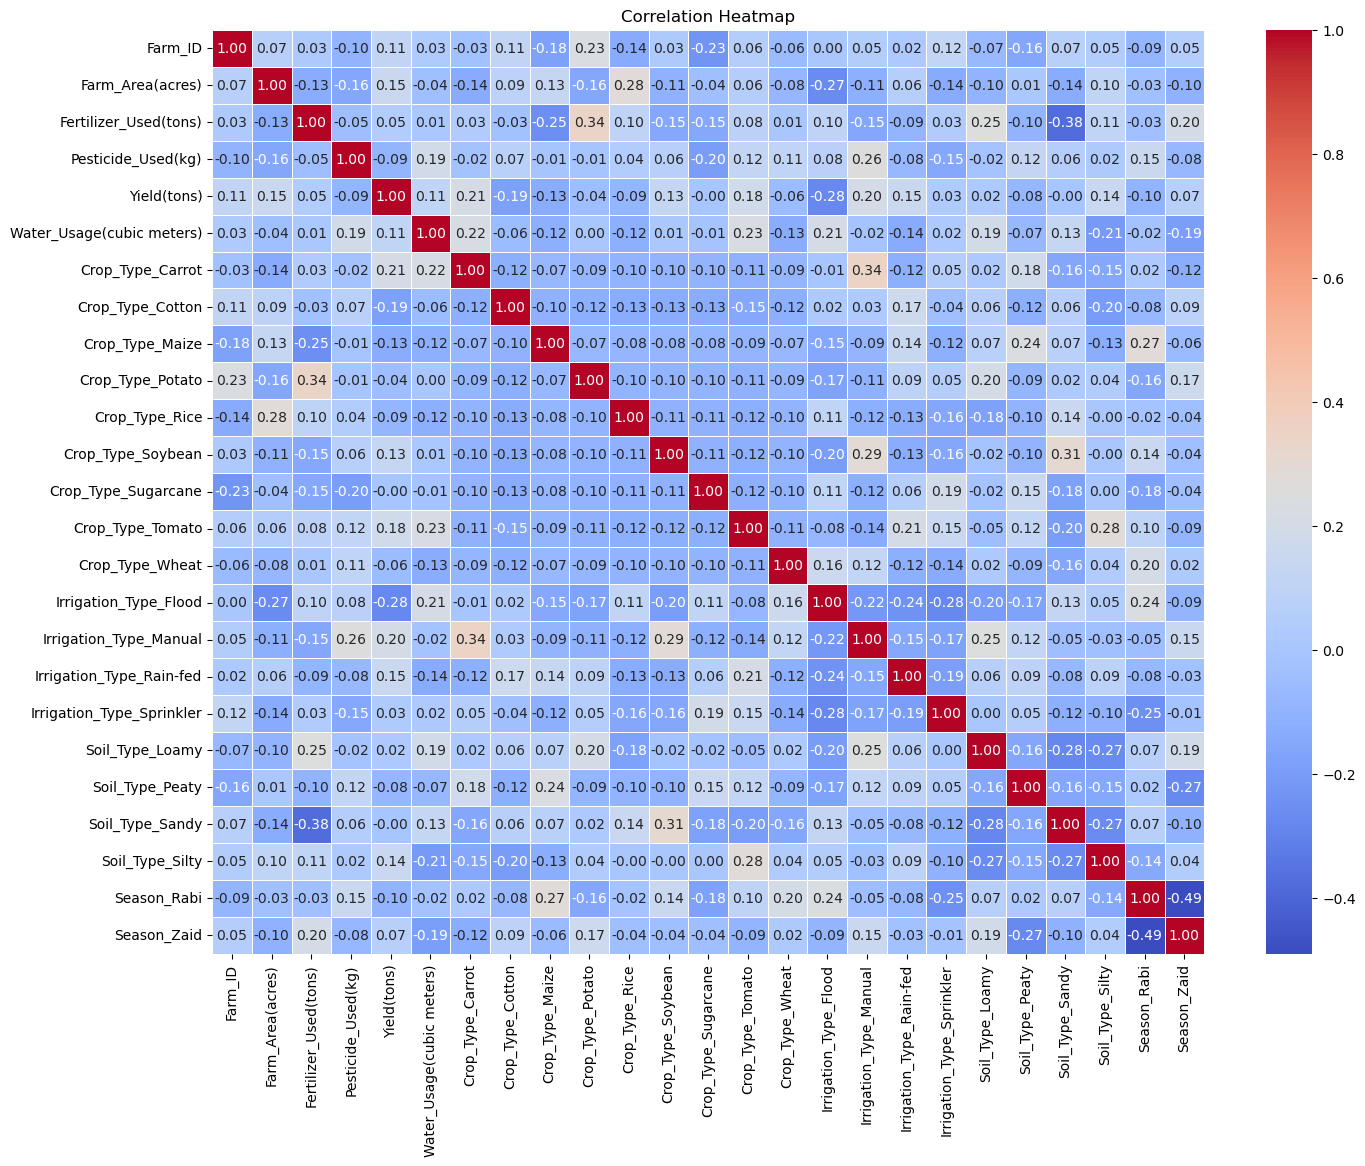

In [19]:
corr_matrix = df_encoded.corr()

# Plotting the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Key Observations:
<font size = '5'>1. Correlation with Yield(tons):</font>

<b>Farm_Area(acres):</b> There is a positive correlation with yield (0.15). Larger farm areas tend to show a slight increase in yield, indicating that farm size might contribute to productivity, but the relationship is weak.<br><br>
<b>Fertilizer_Used(tons):</b> The correlation is positive but weak (0.05). This suggests that while fertilizer contributes to yield improvement, it is not a dominant factor on its own.<br><br>
<b>Water_Usage(cubic meters):</b> There is a positive correlation (0.11), indicating that higher water usage is generally associated with higher yields, as water availability is crucial for crop productivity.<br><br>
<b>Crop Types:</b> Some specific crop types like Crop_Type_Carrot (0.21) and Crop_Type_Tomato (0.18) exhibit positive correlations with yield, indicating that these crops may have higher yield potential.<br><br>
<font size = '5'>2. Relationship Among Inputs:</font>

<b>Fertilizer_Used(tons) and Pesticide_Used(kg):</b> There is a very weak negative correlation (-0.045). This suggests that the two inputs are not directly correlated, and their application may vary based on crop-specific needs.<br><br>
<b>Fertilizer_Used(tons) and Water_Usage(cubic meters):</b> A positive correlation (0.012) indicates that more fertilizer might coincide with more water usage, though the relationship is not strong. Effective fertilization often requires adequate water to maximize nutrient uptake.<br><br>
<font size = '5'>3. Farm_Area(acres):</font>

<b>Farm_Area(acres) and Water_Usage(cubic meters):</b> A weak negative correlation (-0.04) suggests that larger farms do not necessarily use more water per acre, reflecting possible variations in irrigation practices.<br><br>
<b>Farm_Area(acres) and Fertilizer_Used(tons):</b> A weak negative correlation (-0.13) shows that larger farms might use slightly less fertilizer per acre, perhaps reflecting efficiency measures or more extensive cultivation practices.<br><br>
<font size = '5'>4. Impact of Soil Type and Season:</font>

<b>Soil_Type_Loamy:</b> Positively correlated with Yield(tons) (0.02), indicating that loamy soil is generally favorable for higher yields due to its balanced moisture and nutrient retention capabilities.<br><br>
<b>Season_Kharif and Yield(tons):</b> A positive correlation indicates that Kharif season crops generally have higher yields, possibly due to favorable weather and water availability.<br><br>
<font size = '5'>5. Irrigation_Type Effects:</font>

<b>Irrigation_Type_Manual and Yield(tons):</b> Shows a moderate positive correlation (0.19), suggesting that manually irrigated farms may focus on crops with higher yields or have more tailored irrigation practices.<br><br>
<b>Irrigation_Type_Flood and Yield(tons):</b> Negative correlation (-0.27) suggests that flood irrigation may not always lead to the highest yields and could relate to inefficiencies or waterlogging.<br><br>
<font size = '5'>6. Crop-Specific Observations:</font>

Crop_Type_Cotton has a negative correlation with Yield(tons) (-0.19), reflecting its potentially lower average yield compared to other crops.<br><br>
Crop_Type_Potato has a positive correlation with Fertilizer_Used(tons) (0.34), suggesting higher input requirements.<br><br>
<font size = '5'>Summary Insights:</font><br>
<b>Farm Size Influence:</b> While larger farm areas have a weak positive correlation with yield, resource inputs do not scale linearly with size, indicating diverse management practices.<br>
<b>Resource Optimization:</b> Fertilizer, water, and pesticide inputs have varying degrees of correlation with yield, emphasizing the need for crop-specific management strategies.<br>
<b>Soil and Season Importance:</b> Loamy soil and Kharif season tend to positively influence yields, while irrigation type and specific crop types have varying impacts.

# <span style="color:transparent;">4. Model Training and Evaluation</span>

<div style="border-radius: 15px 0 15px 0px; border: 2px solid #008b8b; padding: 10px; background-color: #7fffd4; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #008b8b; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 24px;">4. Model Training and Evaluation</h1>
</div>

In [29]:
X = df_encoded.drop(columns=['Yield(tons)'])  # Features
y = df_encoded['Yield(tons)']  # Target

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
# Dictionary to store models and results
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
   }

results = {}

# Training and evaluating each model
for model_name, model in models.items():
    # Training
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Evaluation
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'MSE': mse, 'R2': r2}
    
    print(f"{model_name} - MSE: {mse:.2f}, R2: {r2:.2f}")


Linear Regression - MSE: 213.73, R2: -0.34
Random Forest - MSE: 131.51, R2: 0.18


In [31]:
best_model = min(results, key=lambda x: results[x]['MSE'])
print(f"The best model is: {best_model} with MSE: {results[best_model]['MSE']:.2f} and R2: {results[best_model]['R2']:.2f}")


The best model is: Random Forest with MSE: 131.51 and R2: 0.18


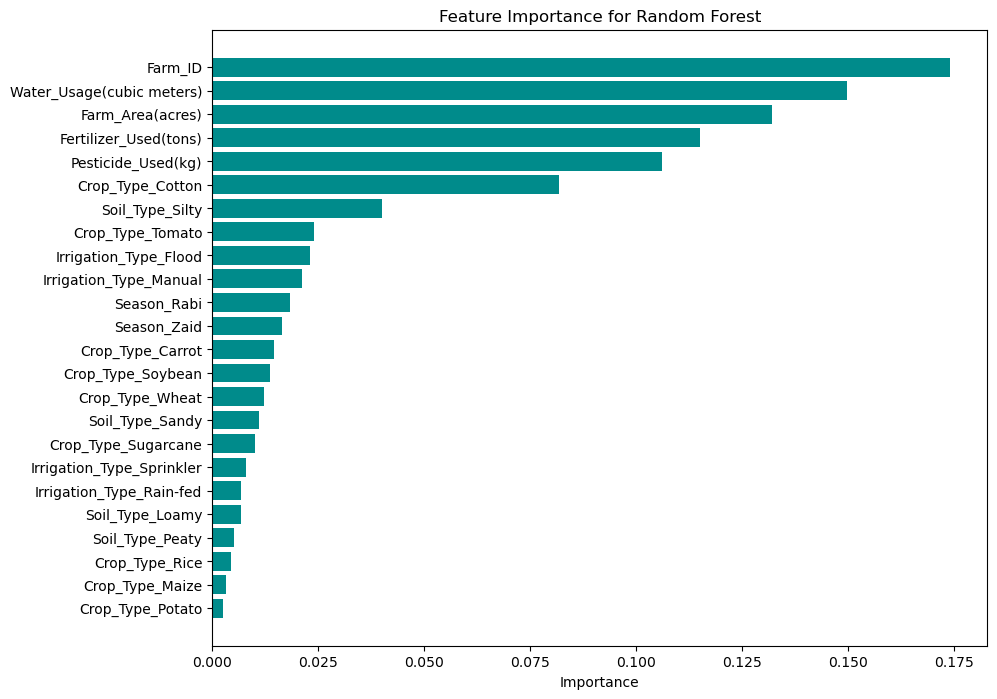

In [33]:
# Assuming best_model is defined and models is a dictionary containing model instances
if best_model in ['Random Forest']:
    best_model_instance = models[best_model]
    feature_importances = best_model_instance.feature_importances_
    sorted_idx = np.argsort(feature_importances)
    feature_names = X.columns
    
    plt.figure(figsize=(10, 8))
    
    plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center', color='darkcyan')
    
    plt.yticks(np.arange(len(sorted_idx)), np.array(feature_names)[sorted_idx])
    plt.title(f'Feature Importance for {best_model}')
    plt.xlabel('Importance')
    plt.show()

In [34]:
# Recreate the best model instance (RandomForestRegressor)
best_model_instance = RandomForestRegressor(random_state=42)
best_model_instance.fit(X_train, y_train) 



RandomForestRegressor(random_state=42)

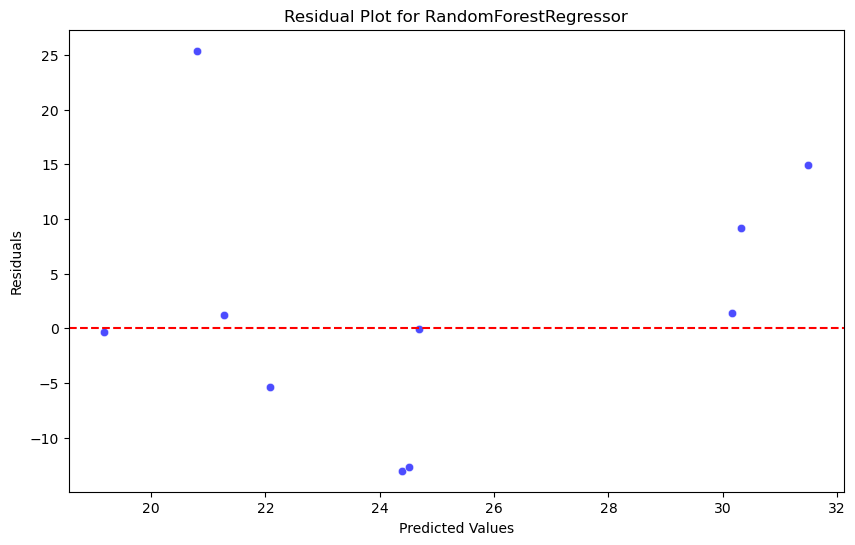

In [37]:
# Generate predictions
y_pred = best_model_instance.predict(X_test)
# Calculate residuals
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.7, color='blue')
plt.axhline(y=0, color='red', linestyle='--')    # in Matplotlib adds a horizontal line across the axes. It's useful for marking specific values or thresholds on a plot.
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')    # Residual (rest or remainder)
plt.title('Residual Plot for RandomForestRegressor')
plt.show()

- Creates a scatter plot, where the predicted values are on the x-axis and the residuals are on the y-axis.
- Horizontal Line: A red dashed line at y=0 helps in visually assessing if the residuals are centered around zero, indicating a good fit.
- The closer the residual values are to y=0, the model is predicting values more accruately.

### Conclusion:

This project focused on analyzing agricultural data at the farm level to understand the key factors influencing crop productivity and to develop predictive models for estimating crop yield. It achieved the highest performance based on evaluation metrics such as Mean Squared Error (MSE) and R-squared (R²). 

This project demonstrates how machine learning can support smart agriculture by improving yield estimation and resource planning.